<a href="https://colab.research.google.com/github/BuiChiCuongs/Detecting-Flower_AI_CNN/blob/main/Final_Course_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.layers.attention.multi_head_attention import activation
import seaborn as sns
import cv2
from os import listdir
from PIL import Image
from numpy.core.multiarray import asarray
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
folder = '/content/drive/MyDrive/Colab Notebooks/Final_Course_Homeworks/Flower_10_data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 10.0
  if file.startswith('Catharanthus'):
    output = 0.0
  if file.startswith('Crownlmperial'):
    output = 1.0
  if file.startswith('Daisy'):
    output = 2.0  
  if file.startswith('Hibiscus'):
    output = 3.0
  if file.startswith('Ixora'):
    output = 4.0
  if file.startswith('PeaceLily'):
    output = 5.0
  if file.startswith('Poinsettia'):
    output = 6.0
  if file.startswith('Rose'):
    output = 7.0
  if file.startswith('Sunflower'):
    output = 8.0
  if file.startswith('Tulip'):
    output = 9.0

  photo = load_img(folder+file, target_size = (40,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(5198, 40, 40, 3) (5198,)


In [5]:
# Save data 
np.save('/content/drive/MyDrive/Colab Notebooks/Final_Course_Homeworks/Flower_photos_1.npy', photos)
np.save('/content/drive/MyDrive/Colab Notebooks/Final_Course_Homeworks/Flower_labels_1.npy', labels)

In [6]:
# Load data
photos = np.load('/content/drive/MyDrive/Colab Notebooks/Final_Course_Homeworks/Flower_photos_1.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/Final_Course_Homeworks/Flower_labels_1.npy')

In [7]:
# split train data, test data
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, random_state=10)

In [8]:
x_train.shape

(4678, 40, 40, 3)

In [9]:
x_test.shape

(520, 40, 40, 3)

In [10]:
y_train.shape

(4678,)

In [11]:
y_test.shape

(520,)

In [12]:
# Standardized data

x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train, 11)

x_test = x_test.astype('float32')/255
y_test = to_categorical(y_test, 11)

In [13]:
y_train.shape

(4678, 11)

In [14]:
y_test.shape

(520, 11)

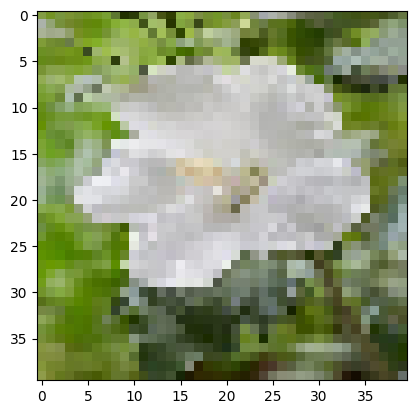

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
img = x_train[1000]
plt.imshow(img)
plt.show()
print(y_train[1000])

In [16]:
model = Sequential()

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', 
                 input_shape=(40, 40, 3)))
model.add(Conv2D(128, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                    

In [17]:
aug = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [18]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=100),
                              epochs=35, validation_data=aug.flow(x_test,y_test, batch_size=100))

<ipython-input-18-acd4205eb3ad>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=100),


Epoch 1/35
47/47 [==============================] - 31s 348ms/step - loss: 2.2040 - accuracy: 0.1794 - val_loss: 2.0674 - val_accuracy: 0.2346
Epoch 2/35
47/47 [==============================] - 7s 158ms/step - loss: 1.7868 - accuracy: 0.3440 - val_loss: 1.6355 - val_accuracy: 0.3750
Epoch 3/35
47/47 [==============================] - 10s 218ms/step - loss: 1.5040 - accuracy: 0.4502 - val_loss: 1.5481 - val_accuracy: 0.4212
Epoch 4/35
47/47 [==============================] - 8s 172ms/step - loss: 1.3396 - accuracy: 0.5297 - val_loss: 1.2809 - val_accuracy: 0.5673
Epoch 5/35
47/47 [==============================] - 6s 133ms/step - loss: 1.1936 - accuracy: 0.5746 - val_loss: 1.2570 - val_accuracy: 0.5519
Epoch 6/35
47/47 [==============================] - 8s 168ms/step - loss: 1.0813 - accuracy: 0.6156 - val_loss: 1.2179 - val_accuracy: 0.5923
Epoch 7/35
47/47 [==============================] - 6s 136ms/step - loss: 1.0735 - accuracy: 0.6225 - val_loss: 1.1743 - val_accuracy: 0.6038
Epoc

In [19]:
# Save model
model.save('/content/drive/MyDrive/Colab Notebooks/Final_Course_Homeworks/Predict_flower_model_f2.h5')

Test loss:  0.7610891461372375
Test accuracy 0.8134615421295166


<ipython-input-20-f0ebb0732086>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy',color='blue')
<ipython-input-20-f0ebb0732086>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss',color='blue')
<ipython-input-20-f0ebb0732086>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, test_accuracy, 'bo', label='Test accuracy',color='red')
<ipython-input-20-f0ebb0732086>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will t

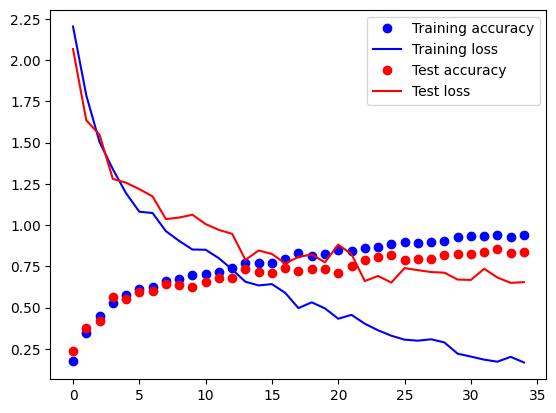

In [20]:
test = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])

accuracy=train.history['accuracy']
loss=train.history['loss']

test_accuracy=train.history['val_accuracy']
test_loss=train.history['val_loss']

epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy',color='blue')
plt.plot(epochs, loss, 'b', label='Training loss',color='blue')

plt.plot(epochs, test_accuracy, 'bo', label='Test accuracy',color='red')
plt.plot(epochs, test_loss, 'b', label='Test loss',color='red')

plt.legend()
plt.show()

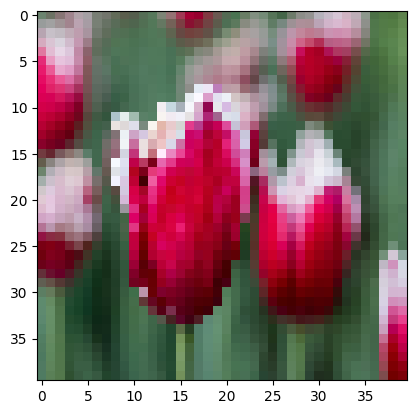

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [36]:
img = x_test[121]
plt.imshow(img)
plt.show()
print(y_test[121])


In [37]:
x_pred = x_test[121].reshape(1,40,40,3)
x_pred=x_pred.astype('float32')/255
matrix = np.argmax(model.predict(x_pred))
class_names = ["Catharanthus", "Crownlmperial", "Daisy", "Hibiscus", "Ixora", 
               "PeaceLily", "Poinsettia", "Rose", "Sunflower", "Tulip", "Dont know"]

class_predict = matrix
print("Predict flower: ", class_names[class_predict])

1/1 [==============================] - 0s 76ms/step
Predict flower:  Tulip
